# <font color='red'> 1 - ENTENDIMENTO DO NEGÓCIO
<a id='descricao'></a>

### <font color='blue'> DESCRIÇÃO DO NEGÓCIO

- Base de dados: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

<font color='green'> **Objetivo:**
- Fazer modelo para classificar funcionários com a probabilidade de ficar na empresa ou de sair.

<font color='green'> **O contexto:**

- Contratar e reter funcionários são tarefas extremamente complexas que exigem capital, tempo e habilidades.
- Pequenos empresários gastam em torno de 40% das horas de trabalho em tarefas que não geram receitas, como a contratação.
- Empresas gastam de 15% a 20% do salário dos funcionários para recrutar um novo candidato.
- Uma empresa média perde entre 1% e 2.5% de sua receita total no tempo que leva para treinar um novo funcionário.
- A contratação de um novo funcionário custa em média $7645 (em uma empresa com aproximadamente 500 funcionários).
- Demora mais ou menos 52 dias para um funcionário ocupar de fato sua nova posição.

Fonte: https://toggl.com/blog/cost-of-hiring-an-employee

<font color='green'> **Causa raiz do problema:**
- Dificuldade em manter as pessoas talentosas na empresa.

<font color='green'> **Stakeholder:**
- Gerente do departamento de Recursos Humanos.

<font color='green'> **O formato da solução:**
- Granularidade
    - Por cada funcionário da empresa.
- Tipo do problema
    - Problema de classificação binária
- Potenciais métodos
    - Random forest, Regressão Logistica
- Formato da entrega
    - Tabela em excel
- Definição
    - Usar Machine Learning para classificar quais funcionários tem uma tendência de para sair do emprego.

### <font color='blue'> PLANEJAMENTO DA SOLUÇÃO

O planejamento da solução para este projeto se baseia no método CRISP-DM (Cross Industry Standard Process for Data Mining), que é uma metodologia cíclica e flexivel voltada para resolução de problemas que envolvem grande volume de dados que permite a entrega rápida de valor para os times de negócio.

1. **ENTENDIMENTO DO NEGÓCIO**


2. **COLETA DOS DADOS**
    - **Passo 0.0:** Biblioteca
    - **Passo 0.1:** Carregando dos dados
    
    
3. **LIMPEZA DOS DADOS**
    - **Passo 1:** Análise Descritiva dos Dados
    - **Passo 2:** Filtragem das Variáveis
    
    
4. **ANÁLISE EXPLORATÓRIA DOS DADOS**
    - **Passo 3:** Exploração de Dados    
    
    
5. **INSIGHTS**
6. **PRÓXIMOS PASSOS**

# <font color='red'> 2 - COLETA DOS DADOS
<a id='dados'></a>

## <font color='blue'> PASSO 0.0 - Biblioteca

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import inflection
import scipy.stats as stats

from pyod.models.knn         import KNN
from scipy                   import stats  as ss

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', category=DeprecationWarning)

## <font color='blue'> PASSO 0.1 - Carregando dos dados

In [3]:
df_funcionario = pd.read_csv('Datasets/Human_Resources.csv')

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# <font color='red'> 3 - LIMPEZA DOS DADOS
<a id='definicao'></a>

## <font color='blue'> PASSO 1 - Análise Descritiva dos Dados
<a id='passo1'></a>

### <font color='#F37126'> 1.1. Leitura dos dados

**Importar e visualizar a base de dados**

In [5]:
df_funcionario.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
df_funcionario.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


**Nota:**
- **Age** = idade das pessoas
- **Attrition** = variável resposta
- **BusinessTravel** = indica se a pessoa faz viajem na empresa
- **DailyRate** = cálculo do sálario da pessoa
- **Department** = departamento onde a pessoa trabalha
- **DistanceFromHome** = distância da casa para empresa em Km
- **Education** = indica o grau de escolaridade
- **EducationField** = indica a área da pessoa de atuação na empresa
- **EmployeeCount** = é como se fosse a contagem dos funcionários
- **EmployeeNumber**= número dos funcionários, como se fosse o registro do funcionário
- **EnvironmentSatisfaction** = nível de satisfação do funcionário com o ambiente de trabalho
- **Gender** = gênero
- **HourlyRate** = indica o número de horas trabalhadas
- **JobInvolvement** = envolvimento no trabalho
- **JobLevel** = nível de trabalho
- **JobRole** = nome das profisões
- **JobSatisfaction** = satisfação no trabalho
- **MaritalStatus** = estado civil
- **MonthlyIncome** = renda mensal
- **MonthlyRate** = taxa mensal
- **NumCompaniesWorked** = número de empresas que o fúnionario trabalhou
- **Over18** = indica se o funcionário tem mais de 18 anos
- **OverTime** = indica se o funcionário faz horas extras
- **PercentSalaryHike** = indica o percentual de aumento que o funcionário ganhou
- **PerformanceRating** = avaliação de desempenho do funcionário
- **RelationshipSatisfaction** = indica o nível de satisfação
- **StandardHours** = quantas horas o funcionário trabalha 
- **StockOptionLevel** = indica se a empresa tem ações na bolsa de valores
- **TotalWorkingYears** = indica quanto tempo o funcionário está trabalhando na empresa
- **TrainingTimesLastYear** = tempo em treinamento
- **WorkLifeBalance** = equilíbrio entre vida profissional
- **YearsAtCompany** = quantos anos o fucionário trabalhou na empresa
- **YearsInCurrentRole** = quantos anos de atuação na função atual
- **YearsSinceLastPromotion** = anos desde a última promoção
- **YearsWithCurrManage** = quantos anos está trabalhando como gerente

### <font color='#F37126'> 1.2. Transformação

In [7]:
# Função de transformação (0= Não tem chance de sair da empresa / 1= Chance em sair da empresa)
df_funcionario['Attrition'] = df_funcionario['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0) 

In [8]:
df_funcionario['OverTime'] = df_funcionario['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
df_funcionario['Over18'] = df_funcionario['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

### <font color='#F37126'> 1.3. Colunas

**Visualizando cabeçalho do dataframe**

In [9]:
print(df_funcionario.columns.tolist())

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [10]:
# Alterando as nomes das colunas
cols_old = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 
            'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 
            'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 
            'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 
            'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 
            'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
            'YearsSinceLastPromotion', 'YearsWithCurrManager']

snakecase = lambda x: inflection.underscore (x)

cols_new = list(map(snakecase,cols_old))

df_funcionario.columns = cols_new

In [11]:
print(df_funcionario.columns.tolist())

['age', 'attrition', 'business_travel', 'daily_rate', 'department', 'distance_from_home', 'education', 'education_field', 'employee_count', 'employee_number', 'environment_satisfaction', 'gender', 'hourly_rate', 'job_involvement', 'job_level', 'job_role', 'job_satisfaction', 'marital_status', 'monthly_income', 'monthly_rate', 'num_companies_worked', 'over18', 'over_time', 'percent_salary_hike', 'performance_rating', 'relationship_satisfaction', 'standard_hours', 'stock_option_level', 'total_working_years', 'training_times_last_year', 'work_life_balance', 'years_at_company', 'years_in_current_role', 'years_since_last_promotion', 'years_with_curr_manager']


### <font color='#F37126'> 1.4. Dimensões de dados

#### Verificando informações sobre o dataframe: linhas e colunas

In [12]:
df_funcionario.shape

(1470, 35)

In [13]:
df_funcionario.apply(lambda x: x.unique().shape[0])

age                             43
attrition                        2
business_travel                  3
daily_rate                     886
department                       3
distance_from_home              29
education                        5
education_field                  6
employee_count                   1
employee_number               1470
environment_satisfaction         4
gender                           2
hourly_rate                     71
job_involvement                  4
job_level                        5
job_role                         9
job_satisfaction                 4
marital_status                   3
monthly_income                1349
monthly_rate                  1427
num_companies_worked            10
over18                           1
over_time                        2
percent_salary_hike             15
performance_rating               2
relationship_satisfaction        4
standard_hours                   1
stock_option_level               4
total_working_years 

#### Verificando o balanceamento da variável alvo

- O equilíbrio de uma base de dados se refere à distribuição das classes nessa base. Uma base de dados é considerada balanceada quando as classes estão distribuídas de forma similar, ou seja, quando não há uma classe majoritária. Já uma base de dados é considerada desbalanceada quando há uma classe majoritária.

In [14]:
# Para virificar o balanceamento - Se as contagens são muito desiguais, isso pode indicar um desequilíbrio.
print(df_funcionario.attrition.value_counts(),'\n')
print(df_funcionario.attrition.value_counts(normalize=True)) # normalize=True calcula a proporção de cada classe

0    1233
1     237
Name: attrition, dtype: int64 

0    0.838776
1    0.161224
Name: attrition, dtype: float64


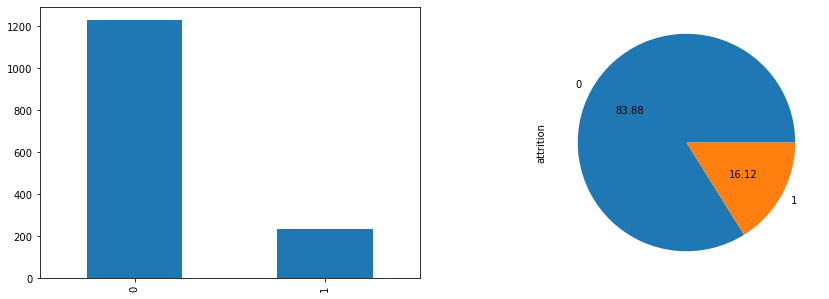

In [15]:
# Visualizando graficamente
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
df_funcionario.attrition.value_counts().plot.bar();

plt.subplot(1,2,2)
df_funcionario.attrition.value_counts().plot.pie(autopct='%.2f');

In [16]:
# Proporção de pessoas que Não tem chance de sair da empresa
NaoSairEmpresa = round(1233 / len(df_funcionario) * 100)
# Proporção de pessoas com Chance em sair da empresa
SairEmpresa = round(237 / len(df_funcionario) * 100)

print('Não tem chance de sair da empresa: ' + str(NaoSairEmpresa) + '%')
print('Pessoas com Chance em sair da empresa: ' + str(SairEmpresa) + '%')

Não tem chance de sair da empresa: 84%
Pessoas com Chance em sair da empresa: 16%


**Nota:**
- A classe majoritária representa **84%** das amostras e a classe minoritária  representa **16%** dos clientes na base de dados, então temos uma base de dados desbalanceada.

- Não há um valor específico ou uma regra geral para determinar quando uma base de dados está desbalanceada em termos de proporção de amostras de cada classe. Isso vai depender do contexto do problema e do que é considerado um desequilíbrio aceitável.

### <font color='#F37126'> 1.5. Tipos de dados

**Verificando o tipo das colunas**

In [17]:
df_funcionario.dtypes

age                            int64
attrition                      int64
business_travel               object
daily_rate                     int64
department                    object
distance_from_home             int64
education                      int64
education_field               object
employee_count                 int64
employee_number                int64
environment_satisfaction       int64
gender                        object
hourly_rate                    int64
job_involvement                int64
job_level                      int64
job_role                      object
job_satisfaction               int64
marital_status                object
monthly_income                 int64
monthly_rate                   int64
num_companies_worked           int64
over18                         int64
over_time                      int64
percent_salary_hike            int64
performance_rating             int64
relationship_satisfaction      int64
standard_hours                 int64
s

### <font color='#F37126'> 1.6. Check dados nulos

**Verificando dados nulos**

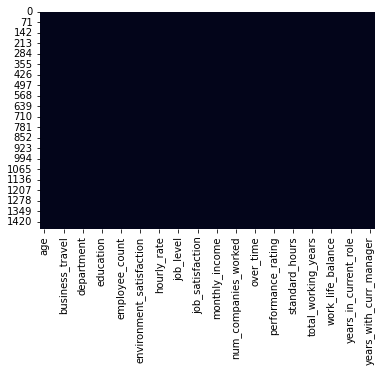

In [18]:
sns.heatmap(df_funcionario.isnull(),cbar=False);

In [19]:
df_funcionario.isnull().sum()

age                           0
attrition                     0
business_travel               0
daily_rate                    0
department                    0
distance_from_home            0
education                     0
education_field               0
employee_count                0
employee_number               0
environment_satisfaction      0
gender                        0
hourly_rate                   0
job_involvement               0
job_level                     0
job_role                      0
job_satisfaction              0
marital_status                0
monthly_income                0
monthly_rate                  0
num_companies_worked          0
over18                        0
over_time                     0
percent_salary_hike           0
performance_rating            0
relationship_satisfaction     0
standard_hours                0
stock_option_level            0
total_working_years           0
training_times_last_year      0
work_life_balance             0
years_at

In [20]:
# Conta a quantidade de missing values totais da base.
df_funcionario.isnull().sum().sum()

0

### <font color='#F37126'> 1.7. Estatística descritiva

**Descrevendo estatísticas sobre os dados**

#### Separando os tipos de variáveis

In [21]:
num_dados = df_funcionario.select_dtypes( include= ['int64','float64'] )
cat_dados = df_funcionario.select_dtypes( exclude= ['int64','float64'])

In [22]:
df_funcionario.describe().round(1)

,age,attrition,daily_rate,distance_from_home,education,employee_count,employee_number,environment_satisfaction,hourly_rate,job_involvement,job_level,job_satisfaction,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
count,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0
mean,36.9,0.2,802.5,9.2,2.9,1.0,1024.9,2.7,65.9,2.7,2.1,2.7,6502.9,14313.1,2.7,1.0,0.3,15.2,3.2,2.7,80.0,0.8,11.3,2.8,2.8,7.0,4.2,2.2,4.1
std,9.1,0.4,403.5,8.1,1.0,0.0,602.0,1.1,20.3,0.7,1.1,1.1,4708.0,7117.8,2.5,0.0,0.5,3.7,0.4,1.1,0.0,0.9,7.8,1.3,0.7,6.1,3.6,3.2,3.6
min,18.0,0.0,102.0,1.0,1.0,1.0,1.0,1.0,30.0,1.0,1.0,1.0,1009.0,2094.0,0.0,1.0,0.0,11.0,3.0,1.0,80.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,30.0,0.0,465.0,2.0,2.0,1.0,491.2,2.0,48.0,2.0,1.0,2.0,2911.0,8047.0,1.0,1.0,0.0,12.0,3.0,2.0,80.0,0.0,6.0,2.0,2.0,3.0,2.0,0.0,2.0
50%,36.0,0.0,802.0,7.0,3.0,1.0,1020.5,3.0,66.0,3.0,2.0,3.0,4919.0,14235.5,2.0,1.0,0.0,14.0,3.0,3.0,80.0,1.0,10.0,3.0,3.0,5.0,3.0,1.0,3.0
75%,43.0,0.0,1157.0,14.0,4.0,1.0,1555.8,4.0,83.8,3.0,3.0,4.0,8379.0,20461.5,4.0,1.0,1.0,18.0,3.0,4.0,80.0,1.0,15.0,3.0,3.0,9.0,7.0,3.0,7.0
max,60.0,1.0,1499.0,29.0,5.0,1.0,2068.0,4.0,100.0,4.0,5.0,4.0,19999.0,26999.0,9.0,1.0,1.0,25.0,4.0,4.0,80.0,3.0,40.0,6.0,4.0,40.0,18.0,15.0,17.0


#### Colunas numéricas

In [23]:
# Central Tendency - mean, meadina 
ct1 = pd.DataFrame( num_dados.apply( np.mean )).T
ct2 = pd.DataFrame( num_dados.apply( np.median )).T

In [24]:
# Desvio Padrão
d1 = pd.DataFrame( num_dados.apply( np.std ) ).T
# Mínimo
d2 = pd.DataFrame( num_dados.apply( min ) ).T
# Máximo
d3 = pd.DataFrame( num_dados.apply( max ) ).T
# Range
d4 = pd.DataFrame( num_dados.apply( lambda x: x.max() - x.min() ) ).T
# Skew
d5 = pd.DataFrame( num_dados.apply( lambda x: x.skew() ) ).T
# Kurtosis
d6 = pd.DataFrame( num_dados.apply( lambda x: x.kurtosis() ) ).T 

In [25]:
# Juntando as metricas em uma tabela
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,age,18.0,60.0,42.0,36.923810,36.0,9.132266,0.413286,-0.404145
1,attrition,0.0,1.0,1.0,0.161224,0.0,0.367738,1.844366,1.403594
2,daily_rate,102.0,1499.0,1397.0,802.485714,802.0,403.371829,-0.003519,-1.203823
3,distance_from_home,1.0,29.0,28.0,9.192517,7.0,8.104107,0.958118,-0.224833
4,education,1.0,5.0,4.0,2.912925,3.0,1.023817,-0.289681,-0.559115
5,employee_count,1.0,1.0,0.0,1.000000,1.0,0.000000,0.000000,0.000000
6,employee_number,1.0,2068.0,2067.0,1024.865306,1020.5,601.819530,0.016574,-1.223179
7,environment_satisfaction,1.0,4.0,3.0,2.721769,3.0,1.092710,-0.321654,-1.202521
8,hourly_rate,30.0,100.0,70.0,65.891156,66.0,20.322512,-0.032311,-1.196398
9,job_involvement,1.0,4.0,3.0,2.729932,3.0,0.711319,-0.498419,0.270999


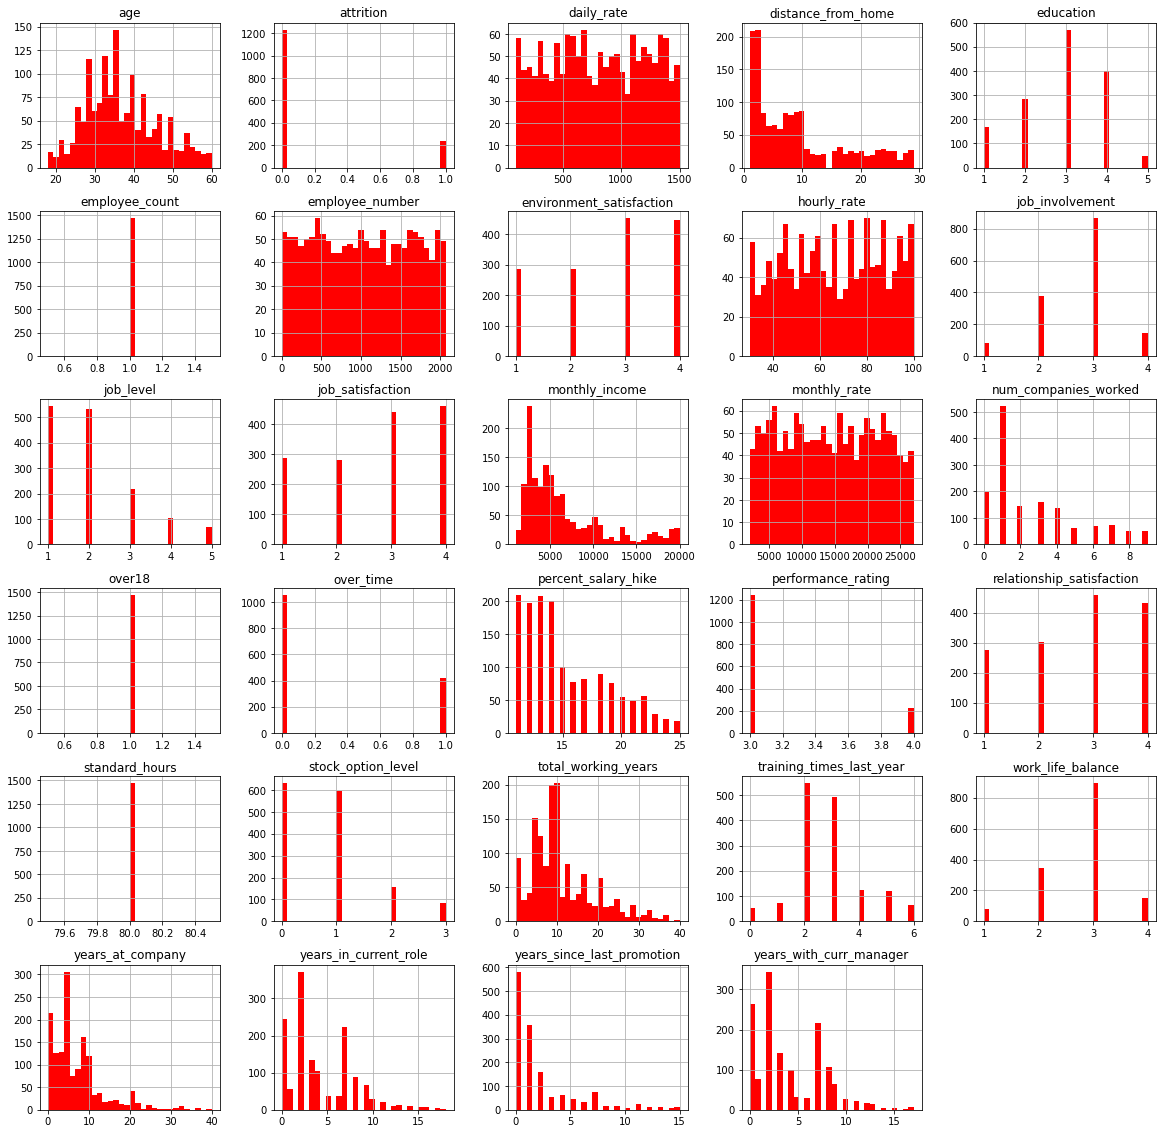

In [26]:
# Histograma para ver a distribuição dos dados
num_dados.hist(bins=30, figsize=(20,20),color='r');

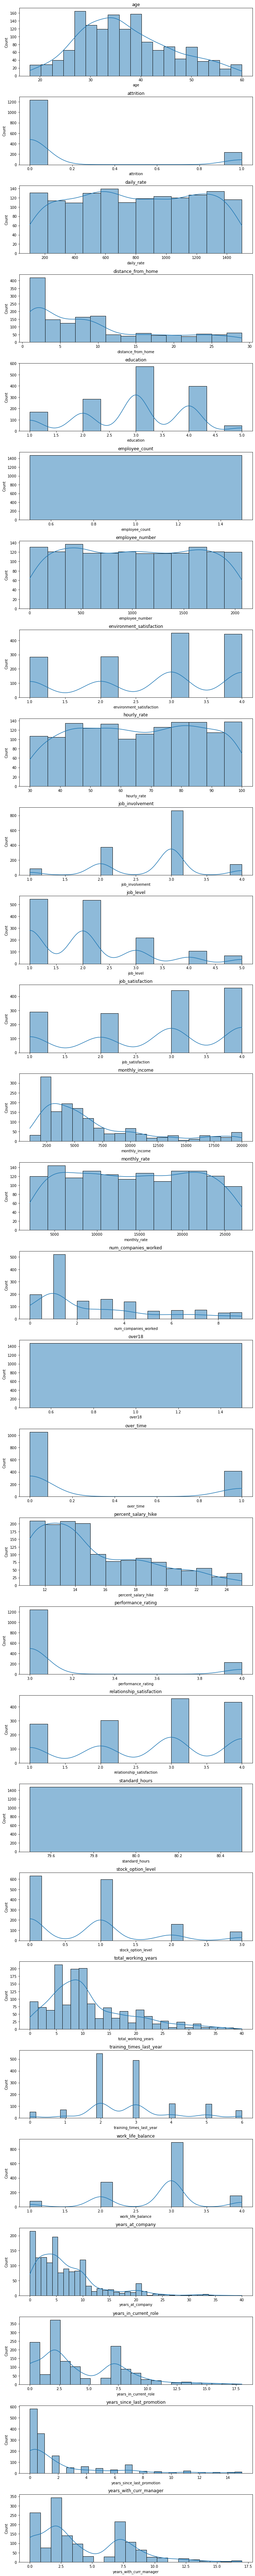

In [27]:
# Histograma para ver a distribuição dos dados para cada atributo
plt.figure(figsize=(10,100))

for i in range(len(num_dados.columns)):
    plt.subplot(29,1, i + 1)
    sns.histplot(num_dados[num_dados.columns[i]], kde=True)
    plt.title(num_dados.columns[i])

plt.tight_layout();

**Nota:**

- Age: A maior concentração de pessoas nesta empresa tem a idade entre 25 à 40 anos.
- Attrition: De acordo com a classe que queremos prever, mostra que temos uma grande maioria de pessoas em torno de 1200 que não tem chances de sair da empresa e em torno de 220 que tem chance de sair da empresa.
- Daily_Rate: Podemos observar que os dados estão em uma distribuição dos dados bem uniforme.
- Distance_From_Home:Podemos perceber que a maioria das pessoas moram próximo da empresa.
- Education: A maioria está no nível 3, que as pessoas com faculdade.
- Employee_Count: Olhando o gráfico, podemos concluir que podemos apagar, porque todos possuem o mesmo valor.
- Environment_Satisfaction: Podemos observar as notas que os funcionarios deram quando foi feito a pesquisa pelo RH.
- Monthly_Income: Podemos notar que a grande maioria das pessoas ganham até 5K e poucas pessoas que ganham mais que 15K.
- Over18: Também tem o mesmo padrão do Employee_Count, todas as pessoa tem mais de 18 anos.
- Standard_Hours: Segue o mesmo padrão de Employee_Count e Over18, também é um indicativo que podemos apagar estes dados.
- Years_At_Company: A maiora das pessoas estão entre o à 10 anos que trabalham na mesma empresa.

#### Colunas Categóricas

In [28]:
# Verificando os valores únicos das colunas
cat_dados.apply( lambda x: x.unique().shape[0] )

business_travel    3
department         3
education_field    6
gender             2
job_role           9
marital_status     3
dtype: int64

### <font color='#F37126'> 1.8. Verificando outliers

#### Identificando Outliers na base de dados

age : int64
attrition : int64
daily_rate : int64
distance_from_home : int64
education : int64
employee_count : int64
employee_number : int64
environment_satisfaction : int64
hourly_rate : int64
job_involvement : int64
job_level : int64
job_satisfaction : int64
monthly_income : int64
monthly_rate : int64
num_companies_worked : int64
over18 : int64
over_time : int64
percent_salary_hike : int64
performance_rating : int64
relationship_satisfaction : int64
standard_hours : int64
stock_option_level : int64
total_working_years : int64
training_times_last_year : int64
work_life_balance : int64
years_at_company : int64
years_in_current_role : int64
years_since_last_promotion : int64
years_with_curr_manager : int64


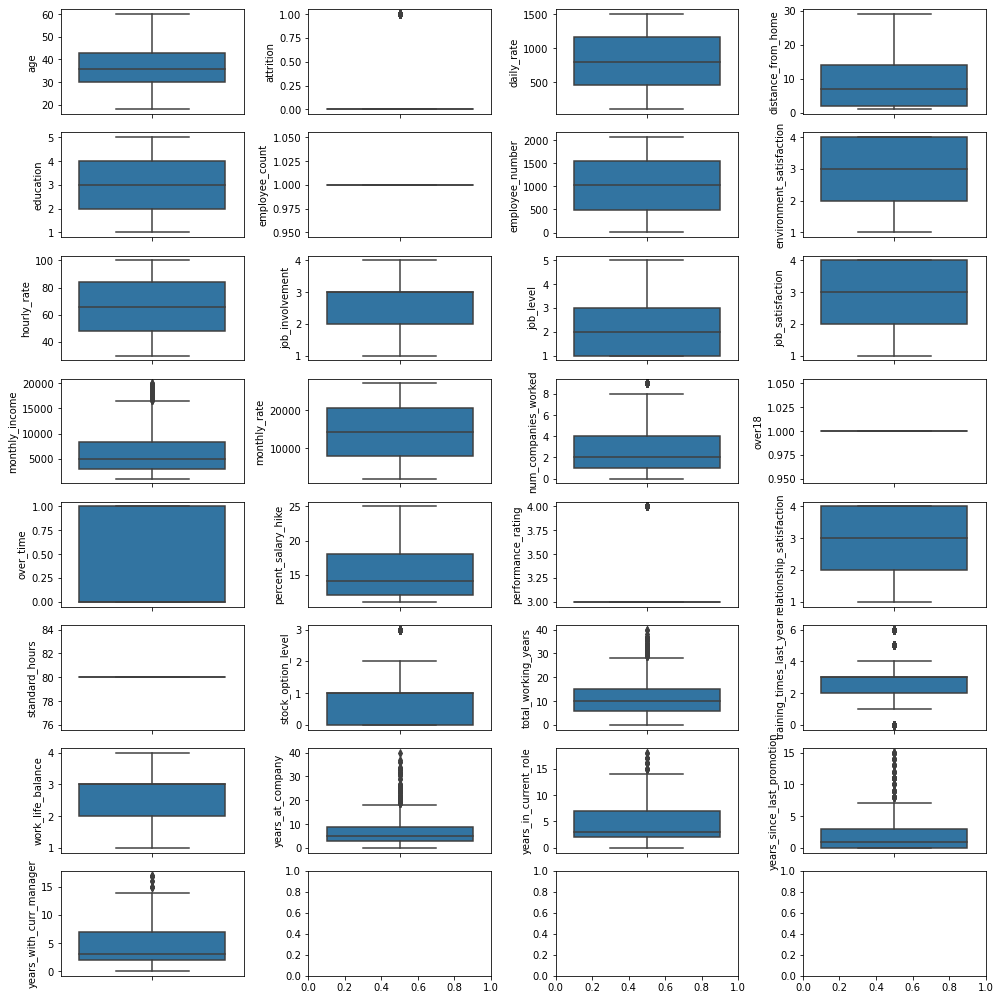

In [29]:
# Carregar variaveis para plot
variaveis_numericas = []
for i in num_dados:
        if num_dados.dtypes[i] == 'int64' or num_dados.dtypes[i] == 'float64':            
            print(i, ':' , num_dados.dtypes[i]) 
            variaveis_numericas.append(i)  
    
    
plt.rcParams["figure.figsize"] = [14.00, 14.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(8, 4) #4 linhas e 4 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = num_dados, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0            

plt.show() 

**Nota:**
- Conseguimos identificar a presença de outliers nas variáveis, mas não identificamos qual registro é outlier.
- Mas nem tudo que está demonstrado, pode ser um outlier.
- Uma forma de listar estes registros é usando a biblioteca PYOD que é uma biblioteca Python para detecção de outlier (anomalia) em dados.

#### Identificando os registros que são Outliers com a Biblioteca PYOD

In [30]:
# Instanciando o objeto KNN 
detector = KNN()

# Treinando um detector de OUTLIERS
detector.fit(num_dados)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

**Nota:**
- O algoritmo KNN é usado nesta biblioteca para medir as distância e calcular outilers.

In [31]:
# A probiedade LABELS_ retorna um ARRAY com 0 e 1
# 0 significa que NÃO é outlier
# 1 significa que É outlier
previsoes = detector.labels_
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
# Fazendo uma contagem para identificar os outliers
np.unique(previsoes, return_counts = True)

(array([0, 1]), array([1323,  147], dtype=int64))

In [33]:
# Observando o calculo da distancia realizado para identificação do outlier
confianca_previsoes = detector.decision_scores_
confianca_previsoes

array([ 819.8475468 , 1004.29975605,  994.6904041 , ..., 1210.91535625,
        912.43849108, 1089.50860483])

In [34]:
# Criando uma lista somente com os outliers
outliers = []
for i in range(len(previsoes)):
    #print(i)
    if previsoes[i] == 1:
        outliers.append(i)

In [35]:
# Fazendo um SLICE no arquivo original filtrando todas as linhas que são outlier (lista de outlier) e todas colunas
lista_outliers = num_dados.iloc[outliers,:]
lista_outliers

,age,attrition,daily_rate,distance_from_home,education,employee_count,employee_number,environment_satisfaction,hourly_rate,job_involvement,job_level,job_satisfaction,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
18,53,0,1219,2,4,1,23,1,78,2,4,4,15427,22021,2,1,0,16,3,3,80,0,31,3,3,25,8,3,7
22,34,0,419,7,4,1,28,1,53,3,3,2,11994,21293,0,1,0,11,3,3,80,0,13,4,3,12,6,2,11
25,53,0,1282,5,3,1,32,3,58,3,5,3,19094,10735,4,1,0,11,3,4,80,1,26,3,2,14,13,4,8
29,46,0,705,2,4,1,38,2,83,3,5,1,18947,22822,3,1,0,12,3,4,80,0,22,2,2,2,2,2,1
43,27,0,994,8,3,1,56,4,37,3,3,3,8726,2975,1,1,0,15,3,4,80,0,9,0,3,9,8,1,7
65,55,0,836,8,3,1,84,4,33,3,4,3,14756,19730,2,1,1,14,3,3,80,3,21,2,3,5,0,0,2
67,45,0,1339,7,3,1,86,2,59,3,3,1,9724,18787,2,1,0,17,3,3,80,1,25,2,3,1,0,0,0
77,45,0,193,6,4,1,101,4,52,3,3,1,13245,15067,4,1,1,14,3,2,80,0,17,3,4,0,0,0,0
82,55,0,111,1,2,1,106,1,70,3,3,4,10239,18092,3,1,0,14,3,4,80,1,24,4,3,1,0,1,0
98,58,0,682,10,4,1,131,4,37,3,4,3,13872,24409,0,1,0,13,3,3,80,0,38,1,2,37,10,1,8


In [36]:
num_dados.shape

(1470, 29)

**Nota:**
- Registros que não são outliers: 1.323
- Registros que o algoritmo classificou como outliers: 147
    
Devemos depois fazer uma análise mais profunda porque nem tudo pode ser um outlier.

#### Detecção de outlier usando teste de hipóteses

O **teste de hipóteses** é uma técnica comum para detectar outliers no aprendizado de máquina. O teste de hipótese é um método de testar uma afirmação sobre um parámetro em uma população, usando dados medidos de uma amostra.


Um dos maiores problemas do aprendizado de máquina é um outlier. Se você negligenciar os valores discrepantes nos dados, isso resultará no baixo desempenho do seu modelo de aprendizado de máquina, da sua máquina preditiva.

Vamos usar o Teste de Grubbs, para detectar outlier.

In [37]:
# Criando um detector de outliers

def outliers_test(data):
    n_cols = data.shape[1]
    for col in range(n_cols):
        x = data.iloc[:, col]
        
        n = len(x)
        mean_x = np.mean(x)
        sd_x = np.std(x)
        
        if sd_x == 0:
            print(f'A coluna {col + 1} não pode ser testada, pois a variância é zero.')
            continue
        
        numerator = max(abs(x - mean_x))
        g_calculated = numerator/sd_x
        print(f'Grubbs Valor Calculado - Coluna {col + 1}: {g_calculated}')
        
        t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
        g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
        print(f'Grubbs Valor Crítico - Coluna {col + 1}: {g_critical}')
        
        if g_critical > g_calculated:
            print(f'Para a variável X na coluna {col + 1}, observamos que o valor calculado é Menor que o valor Crítico. Aceitamos a hipótese de que não há outliers')
        else:
            print(f'Para a variável X na coluna {col + 1}, observamos que o valor calculado é Maior que o valor Crítico. Confirmamos a hipótese de que há outliers')

# Carregando a base de dados
data = num_dados

# Obtendo o nome de todas as colunas
columns = data.columns

# Loop para percorrer cada coluna
for column in columns:
    print("Testando a coluna:", column)
    temp = data[column]
    temp = temp.to_frame()
    outliers_test(temp)
    print("\n")

Testando a coluna: age
Grubbs Valor Calculado - Coluna 1: 2.5268855788880864
Grubbs Valor Crítico - Coluna 1: 4.133386214427365
Para a variável X na coluna 1, observamos que o valor calculado é Menor que o valor Crítico. Aceitamos a hipótese de que não há outliers


Testando a coluna: attrition
Grubbs Valor Calculado - Coluna 1: 2.280905882663635
Grubbs Valor Crítico - Coluna 1: 4.133386214427365
Para a variável X na coluna 1, observamos que o valor calculado é Menor que o valor Crítico. Aceitamos a hipótese de que não há outliers


Testando a coluna: daily_rate
Grubbs Valor Calculado - Coluna 1: 1.7365756967097488
Grubbs Valor Crítico - Coluna 1: 4.133386214427365
Para a variável X na coluna 1, observamos que o valor calculado é Menor que o valor Crítico. Aceitamos a hipótese de que não há outliers


Testando a coluna: distance_from_home
Grubbs Valor Calculado - Coluna 1: 2.444129148682291
Grubbs Valor Crítico - Coluna 1: 4.133386214427365
Para a variável X na coluna 1, observamos que

**Nota:**
- Usando o Teste de Grubbs, para detectar outlier, foi verificado que na base de dados não temos outliers.

## <font color='blue'> PASSO 2 - Filtragem das Variáveis
<a id='passo3'></a>

### <font color='#F37126'> 2.1. Leitura dos dados

**Importar e visualizar a base de dados**

In [38]:
df3_funcionario = df_funcionario

### <font color='#F37126'> 2.2. Selecão das Colunas

In [39]:
df3_funcionario.shape[1]

35

In [40]:
# Apagando as informações
df3_funcionario.drop(['employee_count', 'standard_hours', 'over18', 'employee_number'], axis = 1, inplace=True)

In [41]:
df3_funcionario.shape[1]

31

### <font color='#F37126'> 2.3. Feature Engineering

**Derivando as variáveis**

In [42]:
# Mapeia os valores da coluna "attrition" para as labels desejadas
df3_funcionario['attrition_label'] = df3_funcionario['attrition'].map({0: 'Não tem chance de sair da empresa', 1: 'Chance de sair da empresa'})

# <font color='red'> 4 - ANÁLISE EXPLORATÓRIA DOS DADOS
<a id='eda'></a>

## <font color='blue'> PASSO 3 - Exploração de Dados
<a id='passo4'></a>

### <font color='#F37126'> 3.1. Leitura dos dados

**Importar e visualizar a base de dados**

In [43]:
df4_funcionario = df3_funcionario

In [44]:
df4_funcionario.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,attrition_label
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,Chance de sair da empresa
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,Não tem chance de sair da empresa
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,Chance de sair da empresa
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,Não tem chance de sair da empresa
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,Não tem chance de sair da empresa


In [45]:
df4_funcionario.shape

(1470, 32)

### <font color='#F37126'> 3.2. Análise Univariada

#### Comportamento da variável resposta

In [46]:
# Distribuição dos dados
print('média: ' + str(df4_funcionario.attrition.mean()))
print('mediana: ' + str(df4_funcionario.attrition.median()))
print('moda: ' + str(df4_funcionario.attrition.mode()[0]))
print('desvio padrão: ' + str(df4_funcionario.attrition.std()))
print('valor mínimo: ' + str(df4_funcionario.attrition.min()))
print('valor máximo: ' + str(df4_funcionario.attrition.max()))
print('valor da variancia: ' + str(df4_funcionario.attrition.var()))
print('valor da assimetria: ' + str(df4_funcionario.attrition.skew()))
print('valor da curtose: ' + str(df4_funcionario.attrition.kurtosis()))

média: 0.16122448979591836
mediana: 0.0
moda: 0
desvio padrão: 0.36786303197196357
valor mínimo: 0
valor máximo: 1
valor da variancia: 0.1353232102916059
valor da assimetria: 1.8443661240010911
valor da curtose: 1.4035942007629205


In [47]:
df4_funcionario.groupby('attrition')['attrition'].count()

attrition
0    1233
1     237
Name: attrition, dtype: int64

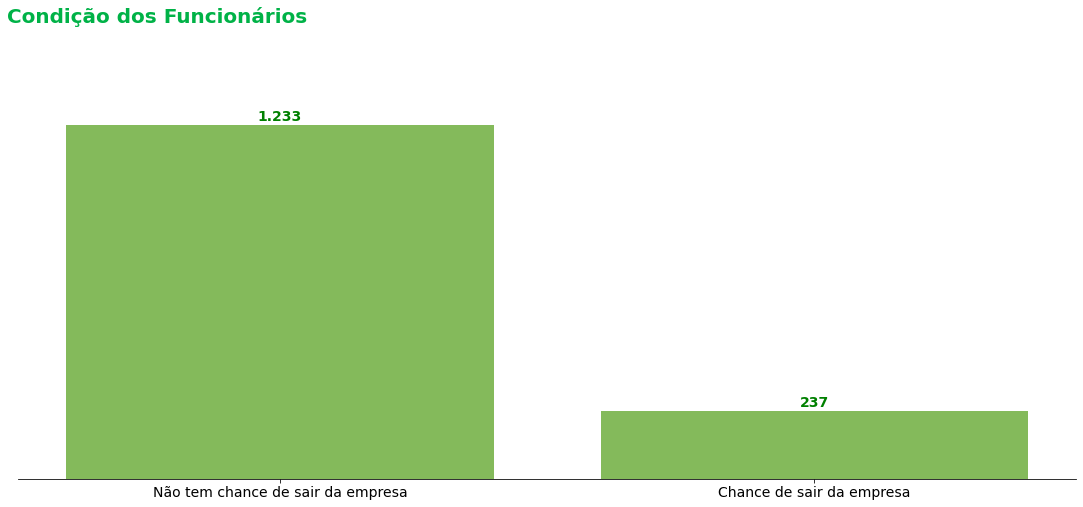

In [48]:
# Gráfico para saber a condição dos funcionários na empresa
fig,ax = plt.subplots( figsize = (15,7))

# Para que o título não fique cortado na figura.
plt.subplots_adjust(top=0.9)
# Título
plt.suptitle('Condição dos Funcionários',fontsize=20, fontweight='bold', color='#00b247', y=1.00, 
             x= 0, horizontalalignment='left')

# Seleciona as linhas com attrition igual a 0
rotatividade_0 = df4_funcionario.loc[df4_funcionario['attrition'] == 0]['attrition'].count()

# Seleciona as linhas com attrition igual a 1
rotatividade_1 = df4_funcionario.loc[df4_funcionario['attrition'] == 1]['attrition'].count()

# Cria um gráfico de barras para cada categoria
ax.bar(0, rotatividade_0, color="#84ba5b")
ax.bar(1, rotatividade_1, color="#84ba5b")

# Define os rótulos do eixo x
ax.set_xticks([0, 1])
ax.set_xticklabels(['Não tem chance de sair da empresa', 'Chance de sair da empresa'], fontsize=14)

# Adiciona as anotações acima de cada barra
for i, status in enumerate([rotatividade_0, rotatividade_1]):
    ax.annotate('{:,.0f}'.format(status).replace(',','.'),
                (i, status),
                ha="center",
                va="top",
                xytext=(0,+15),
                textcoords="offset points",
                fontsize=14, 
                fontweight='bold',
                color="green" 
            )    

ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks(np.array([0,1500]))
ax.grid(False)

plt.savefig('Imagens/Condicao_Funcionários.png', bbox_inches='tight')

plt.show()

**Nota:**
- Temos uma proporção de 20% de funcionários com chance em sair da empresa.
- E os dados estão desbalanceados que para aprendizado do modelo, vamos fazer o balanceamento.

#### Criar sub-DataFrame para verificar os dados estatísticos das pessoas

In [49]:
sairam_df = df4_funcionario[df4_funcionario.attrition == 1]
ficaram_df = df4_funcionario[df4_funcionario.attrition == 0]

In [50]:
print('Total = ', len(df4_funcionario))
print('----------------------------------------------------------------------')
print('Número de funcionários que tem chance em sair da empresa = ', len(sairam_df))
print('Porcentagem = ', (len(sairam_df) / len(df4_funcionario))*100)
print('----------------------------------------------------------------------')
print('Número de funcionários que não tem chance de sair da empresa = ', len(ficaram_df))
print('Porcentagem = ', (len(ficaram_df) / len(df4_funcionario))*100)

Total =  1470
----------------------------------------------------------------------
Número de funcionários que tem chance em sair da empresa =  237
Porcentagem =  16.122448979591837
----------------------------------------------------------------------
Número de funcionários que não tem chance de sair da empresa =  1233
Porcentagem =  83.87755102040816


In [51]:
sairam_df.describe().round(1)

,age,attrition,daily_rate,distance_from_home,education,environment_satisfaction,hourly_rate,job_involvement,job_level,job_satisfaction,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
count,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0
mean,33.6,1.0,750.4,10.6,2.8,2.5,65.6,2.5,1.6,2.5,4787.1,14559.3,2.9,0.5,15.1,3.2,2.6,0.5,8.2,2.6,2.7,5.1,2.9,1.9,2.9
std,9.7,0.0,401.9,8.5,1.0,1.2,20.1,0.8,0.9,1.1,3640.2,7208.2,2.7,0.5,3.8,0.4,1.1,0.9,7.2,1.3,0.8,5.9,3.2,3.2,3.1
min,18.0,1.0,103.0,1.0,1.0,1.0,31.0,1.0,1.0,1.0,1009.0,2326.0,0.0,0.0,11.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,28.0,1.0,408.0,3.0,2.0,1.0,50.0,2.0,1.0,1.0,2373.0,8870.0,1.0,0.0,12.0,3.0,2.0,0.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0
50%,32.0,1.0,699.0,9.0,3.0,3.0,66.0,3.0,1.0,3.0,3202.0,14618.0,1.0,1.0,14.0,3.0,3.0,0.0,7.0,2.0,3.0,3.0,2.0,1.0,2.0
75%,39.0,1.0,1092.0,17.0,4.0,4.0,84.0,3.0,2.0,3.0,5916.0,21081.0,5.0,1.0,17.0,3.0,4.0,1.0,10.0,3.0,3.0,7.0,4.0,2.0,5.0
max,58.0,1.0,1496.0,29.0,5.0,4.0,100.0,4.0,5.0,4.0,19859.0,26999.0,9.0,1.0,25.0,4.0,4.0,3.0,40.0,6.0,4.0,40.0,15.0,15.0,14.0


In [52]:
ficaram_df.describe().round(1)

,age,attrition,daily_rate,distance_from_home,education,environment_satisfaction,hourly_rate,job_involvement,job_level,job_satisfaction,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
count,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0
mean,37.6,0.0,812.5,8.9,2.9,2.8,66.0,2.8,2.1,2.8,6832.7,14265.8,2.6,0.2,15.2,3.2,2.7,0.8,11.9,2.8,2.8,7.4,4.5,2.2,4.4
std,8.9,0.0,403.2,8.0,1.0,1.1,20.4,0.7,1.1,1.1,4818.2,7102.3,2.5,0.4,3.6,0.4,1.1,0.8,7.8,1.3,0.7,6.1,3.6,3.2,3.6
min,18.0,0.0,102.0,1.0,1.0,1.0,30.0,1.0,1.0,1.0,1051.0,2094.0,0.0,0.0,11.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,31.0,0.0,477.0,2.0,2.0,2.0,48.0,2.0,1.0,2.0,3211.0,7973.0,1.0,0.0,12.0,3.0,2.0,0.0,6.0,2.0,2.0,3.0,2.0,0.0,2.0
50%,36.0,0.0,817.0,7.0,3.0,3.0,66.0,3.0,2.0,3.0,5204.0,14120.0,2.0,0.0,14.0,3.0,3.0,1.0,10.0,3.0,3.0,6.0,3.0,1.0,3.0
75%,43.0,0.0,1176.0,13.0,4.0,4.0,83.0,3.0,3.0,4.0,8834.0,20364.0,4.0,0.0,18.0,3.0,4.0,1.0,16.0,3.0,3.0,10.0,7.0,3.0,7.0
max,60.0,0.0,1499.0,29.0,5.0,4.0,100.0,4.0,5.0,4.0,19999.0,26997.0,9.0,1.0,25.0,4.0,4.0,3.0,38.0,6.0,4.0,37.0,18.0,15.0,17.0


**Nota:**
- **Comparativo dos dois dataframe:**
<br><br>
- age: A média das pessoas que saem da empresa é de 33 anos  e a média das pessoas que ficam é de 37 anos e isso acaba validando a ideia que em geral as pessoas mais novas tem uma maior tendência de sairem da empresa.
- daily_rate: Para as pessoas que sairam a média é de 750 e para as pessoas que ficaram é 812,isso indica que o salário das pessoas que ficam na empresa é maior que das pessoas que saem da empresa e isso pode ser um indicativo que as pessoas que saem da empresa elas vão procurar um emprego melhor que tenha uma salário melhor.
- distance_from_home: As pessoas que sairam a distância média é de 10 km e para as pessoas que ficaram é de 8 km.
- education: Observando este atributo, pode ser um indicativo de que as pessoas que tem uma formação maior elas consequentemente tem um salário maior e por isso que elas acabam ficando na empresa. As pessoas que tem um grau de escolaridade menor tem mais chance de sairem da empresa, então a empresa pode oferecer um desconto em mensalidade de faculdades.

#### Variável da idade

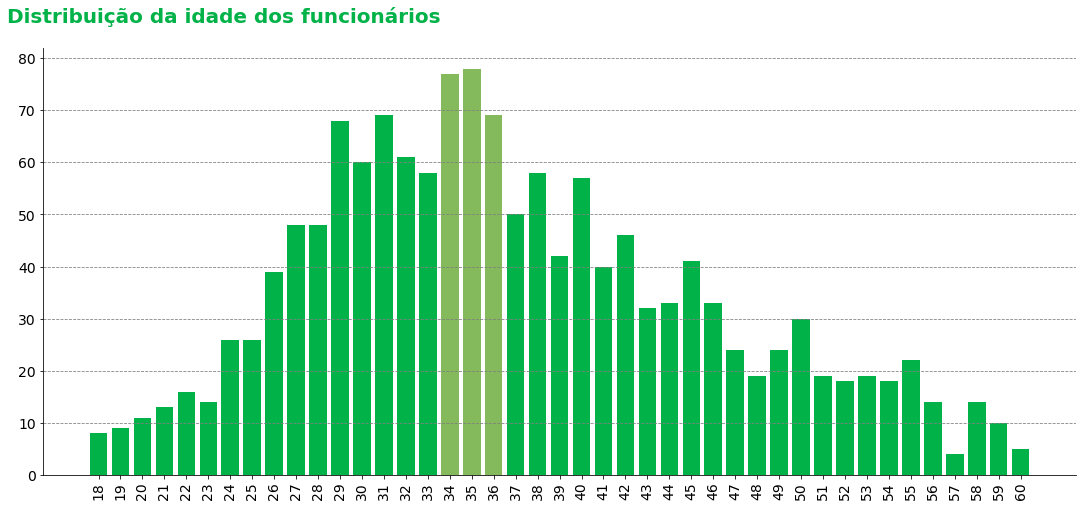

In [53]:
# Gráfico para saber a distribuição da idade dos funcionários na empresa
fig,ax = plt.subplots( figsize = (15,7))

# Para que o título não fique cortado na figura.
plt.subplots_adjust(top=0.9)
# Título
plt.suptitle('Distribuição da idade dos funcionários',fontsize=20, fontweight='bold', color='#00b247', y=1.00,
             x= 0, horizontalalignment='left')


idade = df4_funcionario.groupby('age')['age'].count()

# define as cores das barras
colors = ["#84ba5b" if 34 <= i <= 36 else "#00b247" for i in idade.index]

ax.bar(idade.index, idade.values, color=colors)

ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)
ax.grid(which='major', axis='y', linestyle='--', color='grey', linewidth=0.8)

plt.xticks(idade.index, idade.index, rotation=90)
 
plt.savefig('Imagens/Distribuição_Idade.png', bbox_inches='tight')
    
plt.show()

**Nota:**
- Quase 80 funcionários possuem 35 anos.
- Temos um grupo grande de pessoas com idade entre 34 e 36, essa é uma informação que pode ajudar ao RH. 

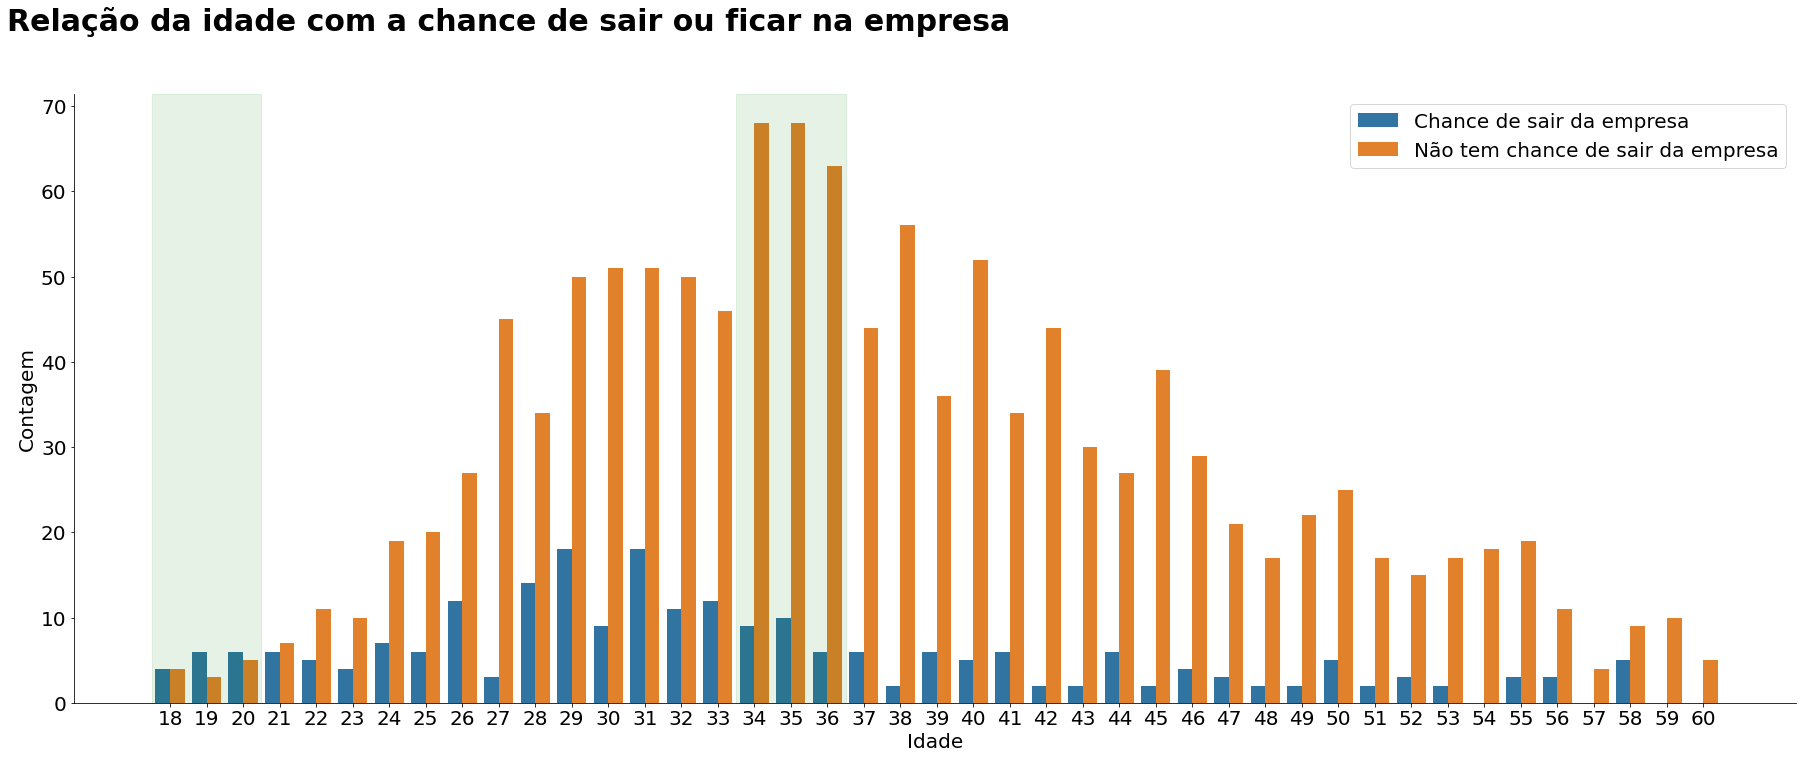

In [54]:
# Gráfico para saber a relação da idade com a chance de sair da empresa
plt.figure(figsize=[25,10])

# Para que o título não fique cortado na figura.
plt.subplots_adjust(top=0.9)
# Título
plt.suptitle('Relação da idade com a chance de sair ou ficar na empresa',fontsize=30, fontweight='bold', y=1.05,
             x= 0, horizontalalignment='left')

plot = sns.countplot(x = 'age', hue = 'attrition_label', data=df4_funcionario)

# Remover a borda do gráfico
sns.despine()

plt.legend(facecolor="white",fontsize=20,loc = 'upper right')

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.xlabel("Idade",fontsize=20)
plt.ylabel("Contagem",fontsize=20)
#plt.box(False)

# adiciona o retângulo
plt.axvspan(-0.5, 2.5, alpha=0.1, color='green')
plt.axvspan(15.5, 18.5, alpha=0.1, color='green')

plt.savefig('Imagens/Ficar_Sair.png', bbox_inches='tight')

plt.show()

**Nota:**
- Pessoas entre 34 há 36 anos é grupo onde a maioria ficam na empresa e uma pequena parcela das pessoas sai.
- Pessoas entre 18 há 20 anos superar a quantidade de pessoas que não tem chance em sair da empresa.

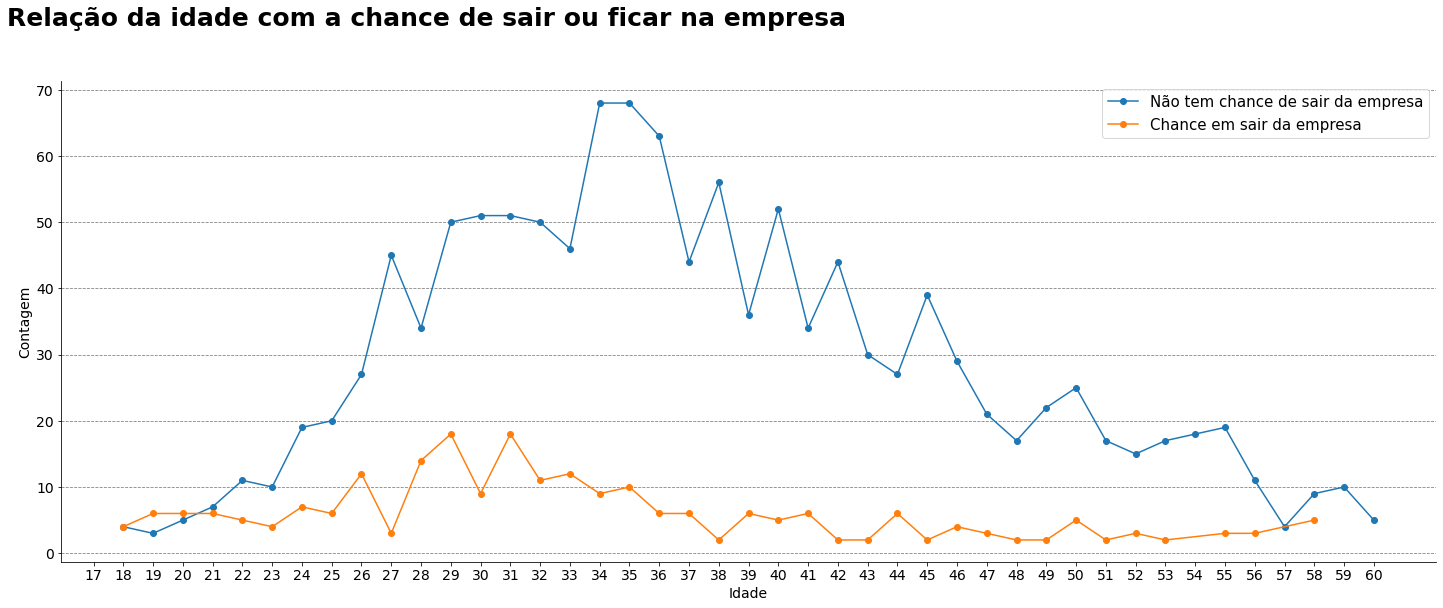

In [55]:
# Gráfico para saber a relação da idade com a chance de sair da empresa
fig, ax = plt.subplots(figsize=(20,8))

# Para que o título não fique cortado na figura.
plt.subplots_adjust(top=0.9)

# Título
plt.suptitle('Relação da idade com a chance de sair ou ficar na empresa',fontsize=25, fontweight='bold',
             y=1.05, x= 0, horizontalalignment='left')

aux1 = df4_funcionario[df4_funcionario.attrition == 0].groupby('age')['attrition'].count()
aux2 = df4_funcionario[df4_funcionario.attrition == 1].groupby('age')['attrition'].count()

ax.plot(aux1.index,aux1.values, label='Não tem chance de sair da empresa', marker = 'o')
ax.plot(aux2.index,aux2.values, label='Chance em sair da empresa', marker = 'o')

ax.xaxis.set_ticks(np.arange(17,61))
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(facecolor="white",fontsize=15)
ax.grid(False)
ax.grid(which='major', axis='y', linestyle='--', color='grey', linewidth=0.8)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Idade",fontsize=14)
plt.ylabel("Contagem",fontsize=14)

plt.savefig('Imagens/IdadeChanceSair.png', bbox_inches='tight')

plt.show()

**Nota:**
- Podemos observar que conforme a idade vai aumentando a tendência das pessoas é que fiquem na empresa.
- A partir da idade de 31 anos segue uma tendência de queda das pessoas que tem chance em sair da empresa.
- Podemos informar para o RH a fazer uma entrevista com os funcionários que tem uma idade menor de 32 anos.

#### Variável nome das profissões (job_role)

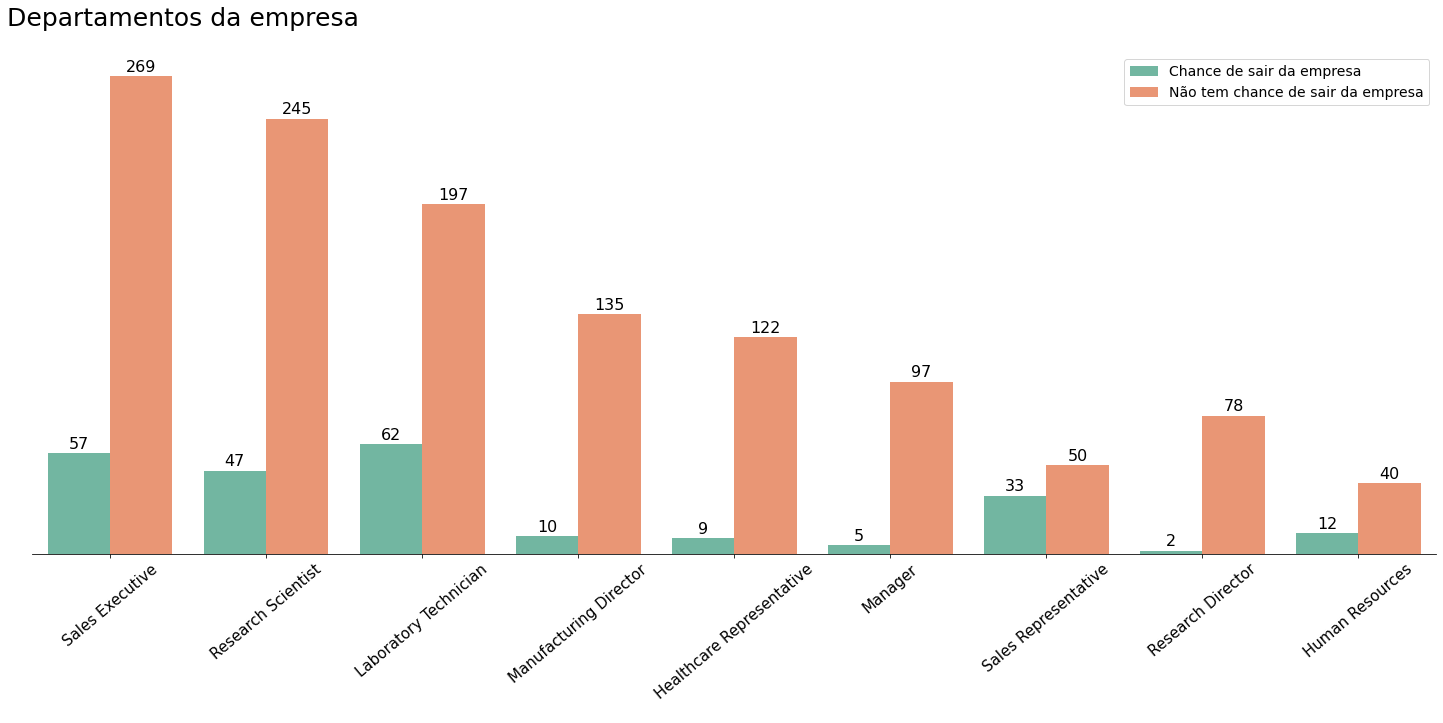

In [56]:
# Gráfico para visualizar os departamentos da empresa
plt.figure(figsize=[20,10])

# Para que o título não fique cortado na figura.
plt.subplots_adjust(top=0.9)

# Título
plt.suptitle("Departamentos da empresa",fontsize=25,y=1.00, x=0, horizontalalignment='left')


plot = sns.countplot(x = 'job_role', hue = 'attrition_label', data = df4_funcionario, palette = "Set2")

for i in plot.patches:
    plot.annotate(i.get_height(), # Texto
                  (i.get_x() + i.get_width() / 2, i.get_height()), # Posição
                  ha='center', va='baseline', fontsize=16,
                  color='black',xytext=(0,5),
                  textcoords='offset points')

plt.yticks([])
plt.legend(facecolor="white",fontsize=14,loc = 'upper right')

plt.xticks(fontsize = 15,rotation=40)
#plt.yticks(fontsize = 15)
plt.ylabel(" ")
plt.xlabel(" ")
plt.grid(False)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.savefig('Imagens/Departamentos_empresa.png', bbox_inches='tight')

plt.show()

**Nota:**
- No departamento temos uma proporção de pessoas com a chance de sair da empresa de:
    - Sales Representative 21%
    - Research Scientist 19%
    - Laboratory Technician 31% 

#### Variável estado civil (marital_status)

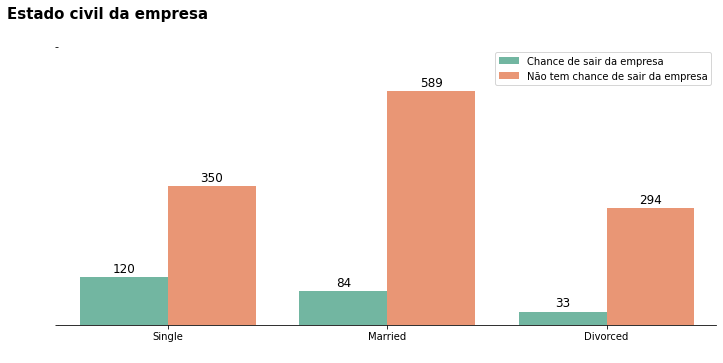

In [57]:
# Gráfico para visualizar a distribuição do estado civel da empresa
plt.figure(figsize=[10,5])

# Para que o título não fique cortado na figura.
plt.subplots_adjust(top=0.9)

# Título
plt.suptitle("Estado civil da empresa",fontsize=15,fontweight='bold',y=1.00, x=0, horizontalalignment='left')

plot = sns.countplot(x = 'marital_status', hue = 'attrition_label', data = df4_funcionario, palette = "Set2")

for i in plot.patches:
    plot.annotate(i.get_height(), # Texto
                  (i.get_x() + i.get_width() / 2, i.get_height()), # Posição
                  ha='center', va='baseline', fontsize=12,
                  color='black',xytext=(0,5),
                  textcoords='offset points')

plt.legend(facecolor="white",fontsize=10,loc = 'upper right')

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.yticks(np.array([0,700]),color='White')

plt.grid(False)

plt.ylabel(" ")
plt.xlabel(" ")

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.savefig('Imagens/Estado_civil_empresa.png', bbox_inches='tight')

plt.show()

In [58]:
print(120/len(df4_funcionario.loc[df4_funcionario.attrition == 1]))
print(84/len(df4_funcionario.loc[df4_funcionario.attrition == 1]))
print(33/len(df4_funcionario.loc[df4_funcionario.attrition == 1]))

0.5063291139240507
0.35443037974683544
0.13924050632911392


**Nota:**
- As pessoas que tem chance em sair da empresa são solteiras (o) que em relação ao total de pessoas que tem a chance em sair da empresa corresponde a 50%.

#### Variável envolvimento no trabalho (job_involvement)

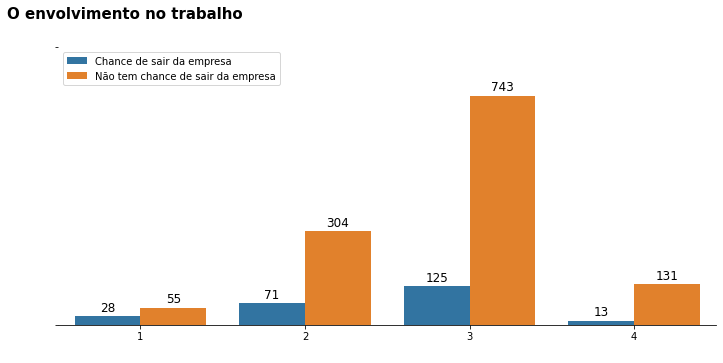

In [59]:
# Gráfico para visualizar o envolvimento no trabalho
plt.figure(figsize=[10,5])

# Para que o título não fique cortado na figura.
plt.subplots_adjust(top=0.9)

# Título
plt.suptitle("O envolvimento no trabalho",fontsize=15,fontweight='bold',y=1.00, x=0, horizontalalignment='left')

plot = sns.countplot(x = 'job_involvement', hue = 'attrition_label', data = df4_funcionario)

for i in plot.patches:
    plot.annotate(i.get_height(), # Texto
                  (i.get_x() + i.get_width() / 2, i.get_height()), # Posição
                  ha='center', va='baseline', fontsize=12,
                  color='black',xytext=(0,5),
                  textcoords='offset points')

plt.legend(facecolor="white",fontsize=10,loc = 'upper left')

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.yticks(np.array([0,900]),color='White')

plt.xlabel(" ")
plt.ylabel(" ")

plt.grid(False)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.savefig('Imagens/Envolvimento_trabalho.png', bbox_inches='tight')

plt.show()

**Nota:**
- Na pesquisa do RH as pessoas que deram a nota 3, são as que mais saem da empresa.

#### Variável nível de trabalho (job_level)

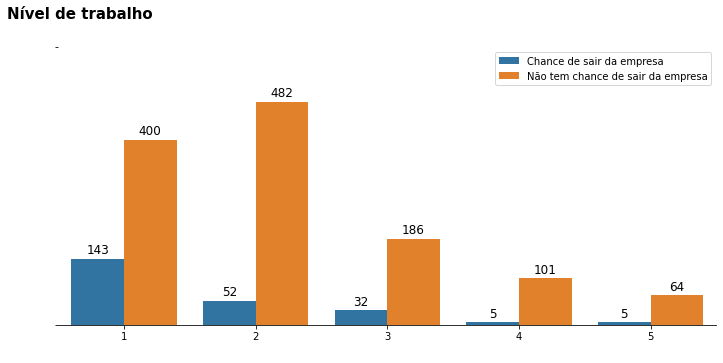

In [60]:
# Gráfico para visualizar o envolvimento no trabalho
plt.figure(figsize=[10,5])

# Para que o título não fique cortado na figura.
plt.subplots_adjust(top=0.9)

# Título
plt.suptitle("Nível de trabalho",fontsize=15,fontweight='bold',y=1.00, x=0, horizontalalignment='left')

plot = sns.countplot(x = 'job_level', hue = 'attrition_label', data = df4_funcionario)

for i in plot.patches:
    plot.annotate(i.get_height(), # Texto
                  (i.get_x() + i.get_width() / 2, i.get_height()), # Posição
                  ha='center', va='baseline', fontsize=12,
                  color='black',xytext=(0,5),
                  textcoords='offset points')

plt.legend(facecolor="white",fontsize=10,loc = 'upper right')

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.yticks(np.array([0,600]),color='White')

plt.xlabel(" ")
plt.ylabel(" ")

plt.grid(False)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.savefig('Imagens/Nível_trabalho.png', bbox_inches='tight')

plt.show()

**Nota:**
- A maioria das pessoas que saem estão na categoria 1, no grupo de pessoas que tem os salários mais baixo.

#### Variavél distância da casa para empresa (distance_from_home) - Densidade de probabilidade 

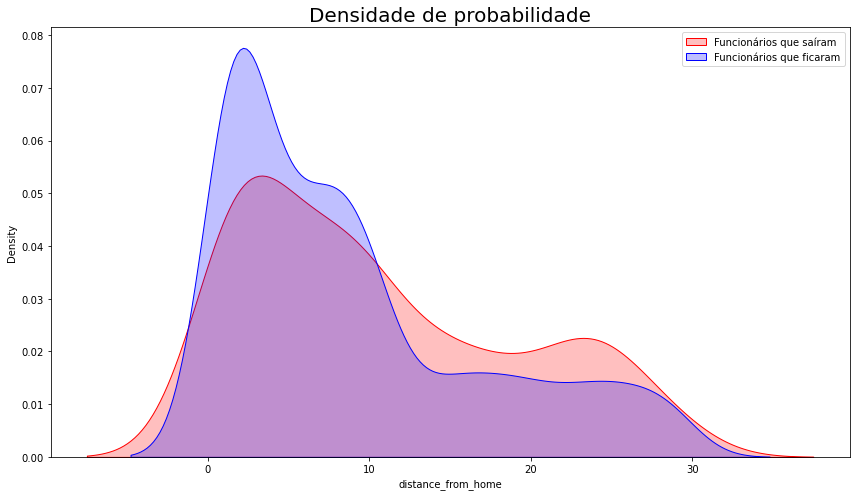

In [61]:
# Gráfico que verifica a densidade de probabilidade de uma variável numérica
# KDE (Kernel Density Estimate)
plt.figure(figsize=(12,7))

sns.kdeplot(sairam_df['distance_from_home'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(ficaram_df['distance_from_home'], label = 'Funcionários que ficaram', shade = True, color = 'b')

plt.legend(facecolor="white",fontsize=10)
plt.title('Densidade de probabilidade',fontsize = 20)
plt.grid(False)

#sns.despine()

plt.savefig('Imagens/Densidade_probabilidade_1.png', bbox_inches='tight')

plt.show()

**Nota:**

O gráfico mostra a distribuição de probabilidade da variável.
- A maioria das pessoas que sairam da empresa, elas moram entre 1 a 10 km de casa até o trabalho.
- A densidade das pessoas que ficam na empresa está entre 1 á 3 km e proporção de pessoas moram maior que 10 km é menor que a proporção das pessoas que sairam.

#### Variavél quanto tempo o funcionário está trabalhando na empresa (total_working_years) - Densidade de probabilidade

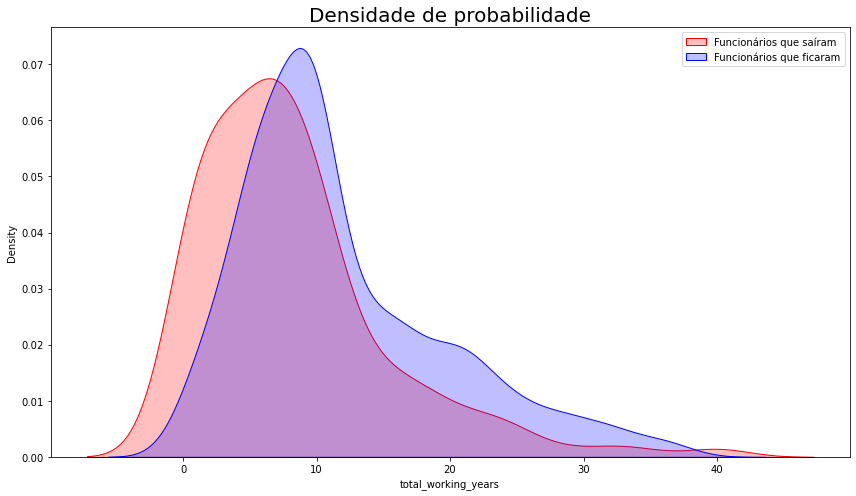

In [62]:
# KDE (Kernel Density Estimate) - gráfico que verifica a densidade de probabilidade de uma variavél númerica
plt.figure(figsize=(12,7))

sns.kdeplot(sairam_df['total_working_years'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(ficaram_df['total_working_years'], label = 'Funcionários que ficaram', shade = True, color = 'b')

plt.legend(facecolor="white",fontsize=10)
plt.title('Densidade de probabilidade',fontsize = 20)
plt.grid(False)

#sns.despine()

plt.savefig('Imagens/Densidade_probabilidade_2.png', bbox_inches='tight')

plt.show()

**Nota:**
- Podemos ver que a densidade das pessoas que ficaram na empresa é maior que a densidade das pessoas que sairam e isso indica que as pessoas que ficam na empresa elas trabalharam mais anos ao longo da vida do que as pessoas que saem da empresa.
- Podemos até fazer uma associação desse atributo com atributo idade ou seja quanto mais nova a pessoa, mais chance ela tem de procurar outro tipo de emprego.

#### Variável renda mensal - feminino e masculino (monthly_income / gender)

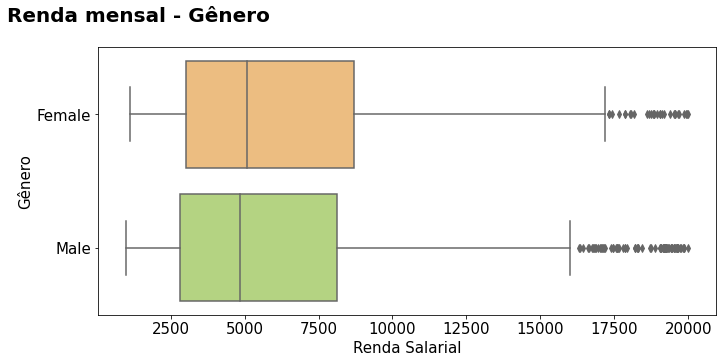

In [63]:
# Verificar se tem algum tipo de ligação entre salário e o gênero
plt.figure(figsize=(10,5))

# Para que o título não fique cortado na figura.
plt.subplots_adjust(top=0.9)

# Título
plt.suptitle("Renda mensal - Gênero",fontsize=20,fontweight='bold',y=1.00, x=0, horizontalalignment='left')

ax = sns.boxplot(x = 'monthly_income', y = 'gender', data = df4_funcionario, palette="RdYlGn")

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Renda Salarial", fontsize=15)
plt.ylabel("Gênero", fontsize=15)
plt.grid(False)

#sns.despine()

plt.savefig('Imagens/Renda_mensal_Gênero.png', bbox_inches='tight')

plt.show()

**Nota:**
- A pessoa que ganha mais é do gênero feminino.
- A mediana do gênero feminino é maior que a mediana do gênero masculino, que pode indicar que nesta base de dados as mulheres ganham mais que os homens.
- Podemos dizer que 75% da mulheres ganham mais que os homens.
- Os valores outliers, pode ser os cargos de gerência.

#### Variável renda mensal - nome das profisões (monthly_income / job_role)

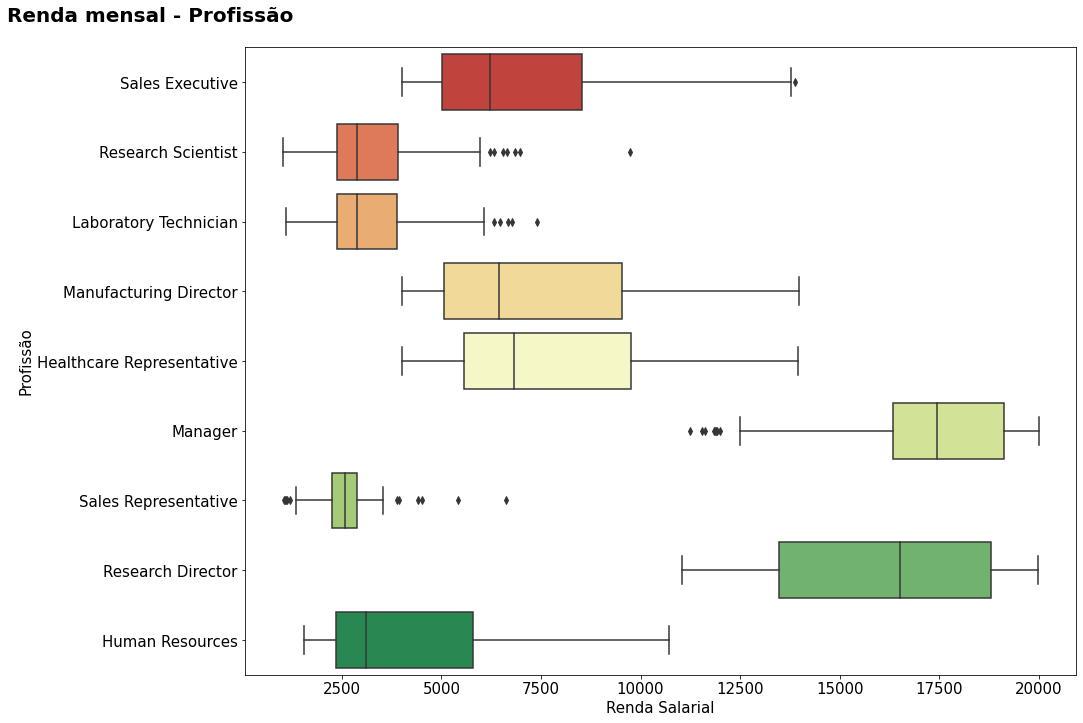

In [64]:
# Verificar se tem algum tipo de ligação entre salário e profissão
plt.figure(figsize=(15,10))

# Para que o título não fique cortado na figura.
plt.subplots_adjust(top=0.9)

# Título
plt.suptitle("Renda mensal - Profissão",fontsize=20,fontweight='bold',y=1.00, x=0, horizontalalignment='left')

ax = sns.boxplot(x = 'monthly_income', y = 'job_role', data = df4_funcionario, palette="RdYlGn")

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Renda Salarial", fontsize=15)
plt.ylabel("Profissão", fontsize=15)
plt.grid(False)

#sns.despine()

plt.savefig('Imagens/Renda_mensal_Profissão.png', bbox_inches='tight')

plt.show()

**Nota:**
- Gerentes tem um salário mais alto.
- O Sale Representative é a profissão onde tem o maior gruopo de pessoas com salários mais baixo.

### <font color='#F37126'> 3.3. Análise Multivariada

#### Correlação para ver o quanto um atributo pode influênciar o outro

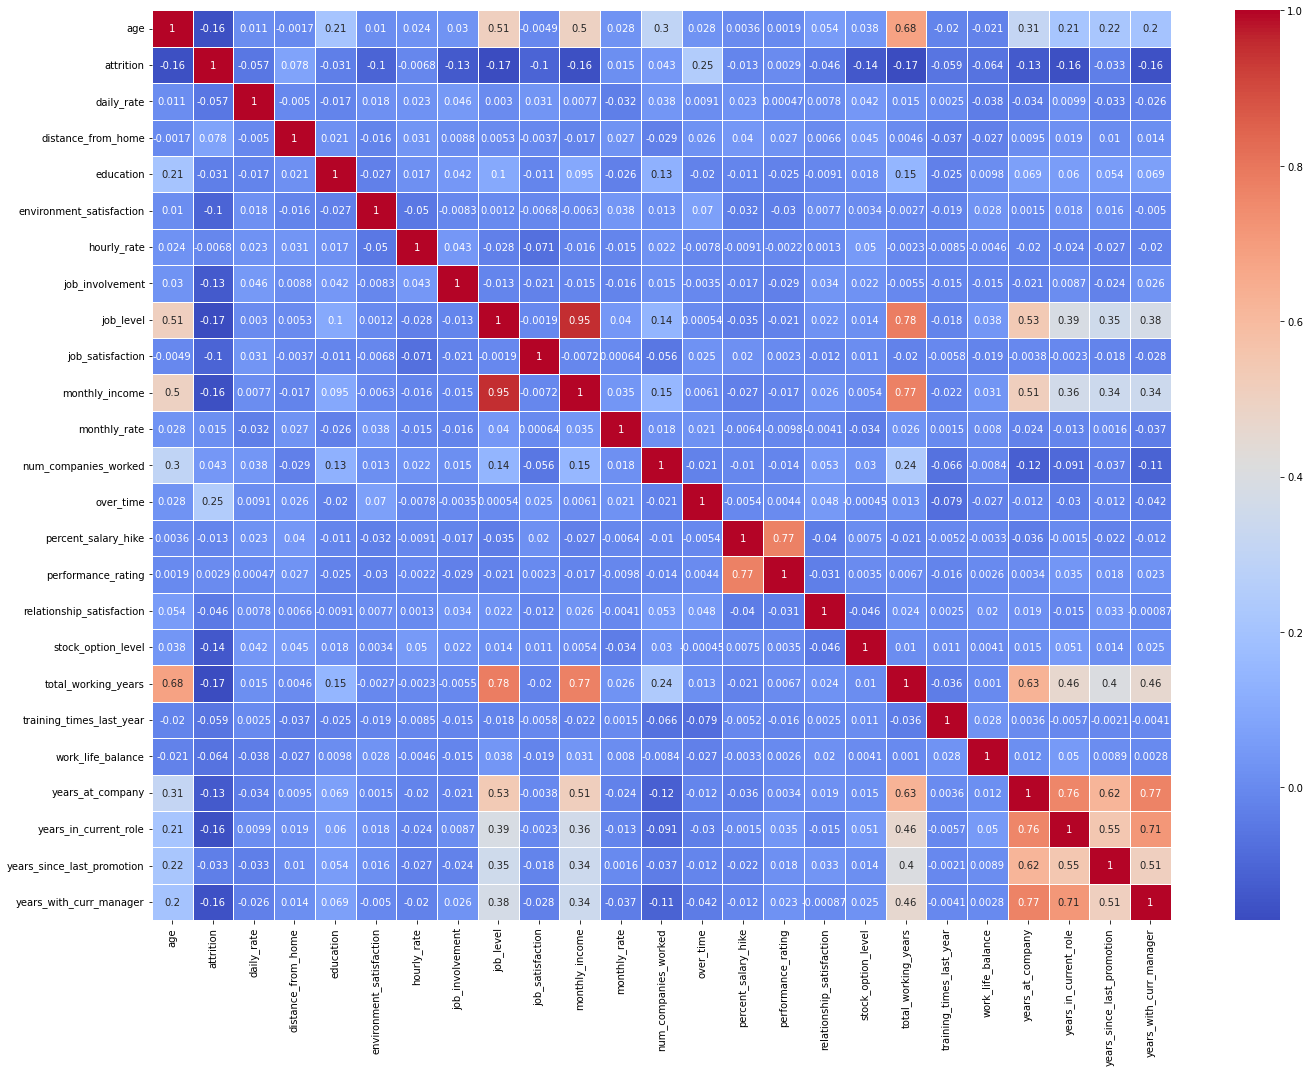

In [65]:
fig, ax = plt.subplots(figsize=(20,15))
correlations = df4_funcionario.corr()
sns.heatmap(correlations,cmap='coolwarm',annot=True,linecolor='white',linewidths=1);
plt.show()

In [66]:
# Criando um rank das correlações
correlations = df4_funcionario.corr()['attrition'].sort_values()
correlations

total_working_years          -0.171063
job_level                    -0.169105
years_in_current_role        -0.160545
monthly_income               -0.159840
age                          -0.159205
years_with_curr_manager      -0.156199
stock_option_level           -0.137145
years_at_company             -0.134392
job_involvement              -0.130016
job_satisfaction             -0.103481
environment_satisfaction     -0.103369
work_life_balance            -0.063939
training_times_last_year     -0.059478
daily_rate                   -0.056652
relationship_satisfaction    -0.045872
years_since_last_promotion   -0.033019
education                    -0.031373
percent_salary_hike          -0.013478
hourly_rate                  -0.006846
performance_rating            0.002889
monthly_rate                  0.015170
num_companies_worked          0.043494
distance_from_home            0.077924
over_time                     0.246118
attrition                     1.000000
Name: attrition, dtype: f

**Nota:**

- Job_Level (0.78) -> Total_Working_Years - Isso indica que o cargo da pessoa está diretamente correlacionado com os anos que pessoa está trabalhando na empresa.
- Total_Working_Years (0.68) -> Age - Quanto mais anos a pessoa está trabalhando na empresa, maior é a idade da pessoa.
- Percent_Salary_Hike (0.77) -> Performance_Ranting - Quanto maior o desempemho da pessoa, mais chance ela tem de ganhar um aumento de salário.
- Monthly_Income (0.77) -> Total_Working_Years - Quanto mais anos a pessoa trabalhou, consequentemente maior é o salário.


**Explicação:**
- quanto mais próximo de 1 mais estão correlacionados.
- correlção positiva é quando as duas variaveis crescem em conjunto (quanto maior a idade, maior é o salário).
- correlação negativa é quando as duas variaveis são opostas (quanto maior a idade menor é o salário)
- uma correlação moderada está em torno de 0.50 e quando temos um valor maior que 0.70 é uma correlação forte, que indica que uma variavél acaba influênciando uma outra variavél.

#### Atributos categóricos

In [67]:
a = df4_funcionario.select_dtypes( include='object' )

In [68]:
a.head()

,business_travel,department,education_field,gender,job_role,marital_status,attrition_label
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Chance de sair da empresa
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Não tem chance de sair da empresa
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Chance de sair da empresa
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Não tem chance de sair da empresa
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Não tem chance de sair da empresa


In [69]:
# Função para calcular Cramér's V
def cramer_v( x, y ):
    cm = pd.crosstab( x, y ).values
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = ss.chi2_contingency( cm )[0]
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) ) # Fórmula Cramér's V para cálcular as variáveis categóricas

In [70]:
# Criando a matrix

# Calculate cramer V
a1 = cramer_v( a['business_travel'], a['business_travel'] )
a2 = cramer_v( a['business_travel'], a['department'] )
a3 = cramer_v( a['business_travel'], a['education_field'] )
a4 = cramer_v( a['business_travel'], a['gender'] )
a5 = cramer_v( a['business_travel'], a['job_role'] )
a6 = cramer_v( a['business_travel'], a['marital_status'] )

a7 = cramer_v( a['department'], a['business_travel'] )
a8 = cramer_v( a['department'], a['department'] )
a9 = cramer_v( a['department'], a['education_field'] )
a10 = cramer_v( a['department'], a['gender'] )
a11 = cramer_v( a['department'], a['job_role'] )
a12 = cramer_v( a['department'], a['marital_status'] )

a13 = cramer_v( a['education_field'], a['business_travel'] )
a14 = cramer_v( a['education_field'], a['department'] )
a15 = cramer_v( a['education_field'], a['education_field'] )
a16 = cramer_v( a['education_field'], a['gender'] )
a17 = cramer_v( a['education_field'], a['job_role'] )
a18 = cramer_v( a['education_field'], a['marital_status'] )

a19 = cramer_v( a['gender'], a['business_travel'] )
a20 = cramer_v( a['gender'], a['department'] )
a21 = cramer_v( a['gender'], a['education_field'] )
a22 = cramer_v( a['gender'], a['gender'] )
a23 = cramer_v( a['gender'], a['job_role'] )
a24 = cramer_v( a['gender'], a['marital_status'] )

a25 = cramer_v( a['job_role'], a['business_travel'] )
a26 = cramer_v( a['job_role'], a['department'] )
a27 = cramer_v( a['job_role'], a['education_field'] )
a28 = cramer_v( a['job_role'], a['gender'] )
a29 = cramer_v( a['job_role'], a['job_role'] )
a30 = cramer_v( a['job_role'], a['marital_status'] )

a31 = cramer_v( a['marital_status'], a['business_travel'] )
a32 = cramer_v( a['marital_status'], a['department'] )
a33 = cramer_v( a['marital_status'], a['education_field'] )
a34 = cramer_v( a['marital_status'], a['gender'] )
a35 = cramer_v( a['marital_status'], a['job_role'] )
a36 = cramer_v( a['marital_status'], a['marital_status'] )

# Final dataset
d = pd.DataFrame( {'business_travel': [a1, a2, a3, a4, a5, a6],
                   'department': [a7, a8, a9, a10, a11, a12],
                   'education_field': [a13, a14, a15, a16, a17, a18],
                   'gender': [a19, a20, a21, a22, a23, a24],
                   'job_role':[a15, a26, a27, a28, a29, a30],
                   'marital_status':[a31, a32, a33, a34, a35, a36]})

d = d.set_index( d.columns )

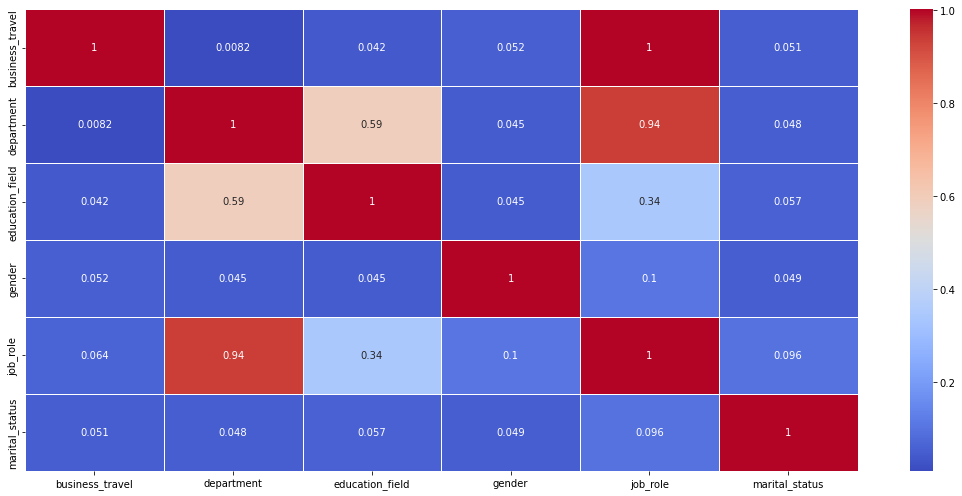

In [71]:
# Matriz de correlações (correlação entre todas as variáveis categóricas)
fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap( d,cmap='coolwarm',annot=True,linecolor='white',linewidths=1 );
plt.show()

**Nota:**
- Podemos ver que entre o departamento onde a pessoa trabalha e a profisões das pessoas tem uma correlação forte, que pode indicar que os funcionários estão trabalhando de acordo com a área de formação.

In [72]:
# Vamos remover a coluna attrition_label, porque ela foi para ajudar na construção dos gráficos
df4_funcionario.drop(columns=['attrition_label'], inplace=True)

# <font color='red'> 5 - INSIGHTS

**Resumo dos insights durante análise exploratória de dados (EDA):**


**Variável idade:**
- Podemos observar que conforme a idade vai aumentando a tendência das pessoas é que fiquem na empresa.
- A partir da idade de 31 anos segue uma tendência de queda das pessoas que tem chance em sair da empresa.
- Pessoas entre 18 há 20 anos superar a quantidade de pessoas que não tem chance em sair da empresa.

**Variável nome das profissões:**
- No departamento temos uma proporção de pessoas com a chance de sair da empresa de:
    - Sales Representative 21%
    - Research Scientist 19%
    - Laboratory Technician 31% 

**Variável estado civil:**
- As pessoas que tem chance em sair da empresa são solteiras (o) que em relação ao total de pessoas que tem a chance em sair da empresa corresponde a 50%.

**Variável nível de trabalho:**
- A maioria das pessoas que saem estão na categoria 1, no grupo de pessoas que tem os salários mais baixo.

**Variável distância da casa para empresa:**
- Podemos perceber que a maioria das pessoas moram próximo da empresa.
- As pessoas que sairam a distância média é de 10 km e para as pessoas que ficaram é de 8 km.
- A densidade das pessoas que ficam na empresa está maior, entre 1 á 3 km.

# <font color='red'> 6 - PRÓXIMOS PASSOS

Criar um modelo de classificação para fazer uma previsão de quais funcionários tem uma tendência de ficar ou sair da empresa.